In [ ]:
#pwd

In [1]:
import sys
sys.path.append(r'C:\Users\jenny\anaconda3\envs\swolfpy\Lib\site-packages')

In [2]:
import swolfpy as sp
import swolfpy_inputdata as spid
import swolfpy_processmodels as sppm

import brightway2 as bw2
import pandas as pd
import numpy as np
from time import time
import matplotlib.pyplot as plt
import datetime
import os
import platform

### Swolfpy version used to produced the results

In [3]:
pd.DataFrame({'Version': [sp.__version__, sppm.__version__, spid.__version__]},
             index=['swolfpy', 'swolfpy_processmodels', 'swolfpy_inputdata'])

,Version
swolfpy,0.2.5
swolfpy_processmodels,0.1.9
swolfpy_inputdata,0.2.4


### System info

In [4]:
pd.DataFrame({'info': [platform.platform(),
                       platform.processor(),
                       os.cpu_count()]},
             index=['Platform', 'Processor', 'CPU_count'])

,info
Platform,Windows-10-10.0.22621-SP0
Processor,"Intel64 Family 6 Model 140 Stepping 1, Genuine..."
CPU_count,8


### Setup for optimization

In [5]:
iter_mehtod = 'LHS' 
n_iter = 100
n_proc = os.cpu_count()

summary = f"""
********  Config *********
Time: {datetime.datetime.now().strftime("%Y-%m-%d & %H:%M:%S")}
Initial guess generation: {iter_mehtod}
N iter: {n_iter}
N proc: {n_proc}\n
"""
text_file = open("Summary.txt", "a")
text_file.write(summary)
text_file.close()

## Create project

In [6]:
project_name = 'SOCIALMETRICS'
technosphere = sp.Technosphere(project_name)
common_data = spid.CommonData()
ProcessMetaData = sppm.ProcessModelsMetaData.ProcessModelsMetaData

In [7]:
# Treatment processes
Treatment_processes = {}
Treatment_processes['LF'] = {'input_type':ProcessMetaData['LF']['InputType'] , 'model':sppm.LF()}
Treatment_processes['Composting'] = {'input_type':ProcessMetaData['Comp']['InputType'] , 'model':sppm.Comp()}
Treatment_processes['AD'] = {'input_type':ProcessMetaData['AD']['InputType'] , 'model':sppm.AD()}
Treatment_processes['WTE'] = {'input_type':ProcessMetaData['WTE']['InputType'] , 'model':sppm.WTE()}
Treatment_processes['SS_MRF'] = {'input_type':ProcessMetaData['SS_MRF']['InputType'] , 'model':sppm.SS_MRF()}
Treatment_processes['Reprocessing'] = {'input_type':ProcessMetaData['Reproc']['InputType'] , 'model':sppm.Reproc()}


In [8]:
# Distance
default_dist = 80;
Processes = ['LF','Composting', 'AD', 'WTE','SS_MRF', 'Reprocessing', 'Collection']
data = sppm.Distance.create_distance_table(process_names=Processes,
                                           transport_modes=['Heavy Duty Truck'],
                                           default_dist=2)

for p in Processes:
    if (p != 'Collection'):
        data['Heavy Duty Truck']['Collection'][p] = default_dist

distance = sppm.Distance(data)          

data['Heavy Duty Truck']

,LF,Composting,AD,WTE,SS_MRF,Reprocessing,Collection
LF,NaN,2.0,2.0,2.0,2.0,2.0,80.0
Composting,NaN,NaN,2.0,2.0,2.0,2.0,80.0
AD,NaN,NaN,NaN,2.0,2.0,2.0,80.0
WTE,NaN,NaN,NaN,NaN,2.0,2.0,80.0
SS_MRF,NaN,NaN,NaN,NaN,NaN,2.0,80.0
Reprocessing,NaN,NaN,NaN,NaN,NaN,NaN,80.0
Collection,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
# Collection_processes:
# Only include one single family sector wih residual waste collection
Collection_scheme = sppm.SF_Col.scheme()
Collection_scheme[('RWC', 'SSYW', 'SSR')] = 0.5
Collection_scheme[('RWC', 'N/A', 'N/A')] = 0.5

Collection_processes = {}
Collection_processes['Collection'] = {'input_type': [],
                                      'model': sppm.SF_Col('Collection', Collection_scheme,
                                                      Treatment_processes=Treatment_processes,
                                                      Distance=distance)}

In [10]:
start = time()
demo = sp.Project(project_name, common_data, Treatment_processes, distance, Collection_processes, technosphere)
demo.init_project()
demo.write_project()
demo.group_exchanges()
print("Time for writing the project: {} second".format(round(time()-start)))

Biosphere database already present!!! No setup is needed
Vacuuming database 
Vacuuming database 


Writing activities to SQLite3 database:



                ####
                ++++++  Writing the Technosphere
                


0% [##############################] 100% | ETA: 00:00:00
Total time elapsed: 00:00:18


Title: Writing activities to SQLite3 database:
  Started: 05/22/2023 15:35:52
  Finished: 05/22/2023 15:36:10
  Total time elapsed: 00:00:18
  CPU %: 8.20
  Memory %: 1.48


Writing activities to SQLite3 database:



              ####
              ++++++ Initializing the LF
              


0% [##############################] 100% | ETA: 00:00:00
Total time elapsed: 00:00:00
Writing activities to SQLite3 database:


Title: Writing activities to SQLite3 database:
  Started: 05/22/2023 15:36:11
  Finished: 05/22/2023 15:36:11
  Total time elapsed: 00:00:00
  CPU %: 104.20
  Memory %: 1.48

              ####
              ++++++ Initializing the Composting
              


0% [##############################] 100% | ETA: 00:00:00
Total time elapsed: 00:00:00


Title: Writing activities to SQLite3 database:
  Started: 05/22/2023 15:36:11
  Finished: 05/22/2023 15:36:11
  Total time elapsed: 00:00:00
  CPU %: 0.00
  Memory %: 1.48


Writing activities to SQLite3 database:



              ####
              ++++++ Initializing the AD
              


0% [##############################] 100% | ETA: 00:00:00
Total time elapsed: 00:00:00


Title: Writing activities to SQLite3 database:
  Started: 05/22/2023 15:36:11
  Finished: 05/22/2023 15:36:11
  Total time elapsed: 00:00:00
  CPU %: 0.00
  Memory %: 1.48


Writing activities to SQLite3 database:



              ####
              ++++++ Initializing the WTE
              


0% [##############################] 100% | ETA: 00:00:00
Total time elapsed: 00:00:00


Title: Writing activities to SQLite3 database:
  Started: 05/22/2023 15:36:12
  Finished: 05/22/2023 15:36:12
  Total time elapsed: 00:00:00
  CPU %: 50.40
  Memory %: 1.48


Writing activities to SQLite3 database:



              ####
              ++++++ Initializing the SS_MRF
              


0% [##############################] 100% | ETA: 00:00:00
Total time elapsed: 00:00:00


Title: Writing activities to SQLite3 database:
  Started: 05/22/2023 15:36:12
  Finished: 05/22/2023 15:36:12
  Total time elapsed: 00:00:00
  CPU %: 0.00
  Memory %: 1.48


Writing activities to SQLite3 database:



              ####
              ++++++ Initializing the Reprocessing
              


0% [###############] 100% | ETA: 00:00:00
Total time elapsed: 00:00:00


Title: Writing activities to SQLite3 database:
  Started: 05/22/2023 15:36:12
  Finished: 05/22/2023 15:36:12
  Total time elapsed: 00:00:00
  CPU %: 104.20
  Memory %: 1.48


Writing activities to SQLite3 database:



              ####
              ++++++ Initializing the Collection
              


0% [##############################] 100% | ETA: 00:00:00
Total time elapsed: 00:00:00


Title: Writing activities to SQLite3 database:
  Started: 05/22/2023 15:36:12
  Finished: 05/22/2023 15:36:12
  Total time elapsed: 00:00:00
  CPU %: 0.00
  Memory %: 1.48

              ####
              ++++++ Writing the LF
              


Writing activities to SQLite3 database:
0% [##############################] 100% | ETA: 00:00:00
Total time elapsed: 00:00:01


Title: Writing activities to SQLite3 database:
  Started: 05/22/2023 15:36:12
  Finished: 05/22/2023 15:36:14
  Total time elapsed: 00:00:01
  CPU %: 12.10
  Memory %: 1.50


Writing activities to SQLite3 database:



                  ####
                  ++++++ Writing the Composting_product
                  


0% [##############################] 100% | ETA: 00:00:00
Total time elapsed: 00:00:00


Title: Writing activities to SQLite3 database:
  Started: 05/22/2023 15:36:14
  Finished: 05/22/2023 15:36:14
  Total time elapsed: 00:00:00
  CPU %: 0.00
  Memory %: 1.52


Writing activities to SQLite3 database:



              ####
              ++++++ Writing the Composting
              


0% [##############################] 100% | ETA: 00:00:00
Total time elapsed: 00:00:00


Title: Writing activities to SQLite3 database:
  Started: 05/22/2023 15:36:14
  Finished: 05/22/2023 15:36:15
  Total time elapsed: 00:00:00
  CPU %: 11.10
  Memory %: 1.52


Writing activities to SQLite3 database:



                  ####
                  ++++++ Writing the AD_product
                  


0% [##############################] 100% | ETA: 00:00:00
Total time elapsed: 00:00:00


Title: Writing activities to SQLite3 database:
  Started: 05/22/2023 15:36:15
  Finished: 05/22/2023 15:36:15
  Total time elapsed: 00:00:00
  CPU %: 33.20
  Memory %: 1.52

              ####
              ++++++ Writing the AD
              


Writing activities to SQLite3 database:
0% [##############################] 100% | ETA: 00:00:00
Total time elapsed: 00:00:00


Title: Writing activities to SQLite3 database:
  Started: 05/22/2023 15:36:15
  Finished: 05/22/2023 15:36:16
  Total time elapsed: 00:00:00
  CPU %: 7.70
  Memory %: 1.52


Writing activities to SQLite3 database:



                  ####
                  ++++++ Writing the WTE_product
                  


0% [##############################] 100% | ETA: 00:00:00
Total time elapsed: 00:00:00


Title: Writing activities to SQLite3 database:
  Started: 05/22/2023 15:36:16
  Finished: 05/22/2023 15:36:16
  Total time elapsed: 00:00:00
  CPU %: 37.50
  Memory %: 1.53


Writing activities to SQLite3 database:



              ####
              ++++++ Writing the WTE
              


0% [##############################] 100% | ETA: 00:00:00
Total time elapsed: 00:00:00


Title: Writing activities to SQLite3 database:
  Started: 05/22/2023 15:36:17
  Finished: 05/22/2023 15:36:17
  Total time elapsed: 00:00:00
  CPU %: 7.70
  Memory %: 1.53


Writing activities to SQLite3 database:



                  ####
                  ++++++ Writing the SS_MRF_product
                  


0% [##############################] 100% | ETA: 00:00:00
Total time elapsed: 00:00:00


Title: Writing activities to SQLite3 database:
  Started: 05/22/2023 15:36:18
  Finished: 05/22/2023 15:36:18
  Total time elapsed: 00:00:00
  CPU %: 12.00
  Memory %: 1.55


Writing activities to SQLite3 database:



              ####
              ++++++ Writing the SS_MRF
              


0% [##############################] 100% | ETA: 00:00:00
Total time elapsed: 00:00:00
Writing activities to SQLite3 database:


Title: Writing activities to SQLite3 database:
  Started: 05/22/2023 15:36:19
  Finished: 05/22/2023 15:36:20
  Total time elapsed: 00:00:00
  CPU %: 0.00
  Memory %: 1.56

              ####
              ++++++ Writing the Reprocessing
              


0% [###############] 100% | ETA: 00:00:00
Total time elapsed: 00:00:00
C:\Users\jenny\anaconda3\envs\swolfpy\Lib\site-packages\swolfpy_processmodels\SF_Col.py:793: FutureWarning:

The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.

C:\Users\jenny\anaconda3\envs\swolfpy\Lib\site-packages\swolfpy_processmodels\SF_Col.py:794: FutureWarning:

The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.

C:\Users\jenny\anaconda3\envs\swolfpy\Lib\site-packages\swolfpy_processmodels\SF_Col.py:793: FutureWarning:

The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.

C:\Users\jenny\anaconda3\envs\swolfpy\Lib\site-packages\swolfpy_processmodels\SF_Col.py:794: FutureWarning:

The default dtype for empty Series will be 'object' 

Title: Writing activities to SQLite3 database:
  Started: 05/22/2023 15:36:20
  Finished: 05/22/2023 15:36:20
  Total time elapsed: 00:00:00
  CPU %: 0.00
  Memory %: 1.56


Writing activities to SQLite3 database:



                  ####
                  ++++++ Writing the Collection_product
                  


0% [##############################] 100% | ETA: 00:00:00
Total time elapsed: 00:00:00


Title: Writing activities to SQLite3 database:
  Started: 05/22/2023 15:36:20
  Finished: 05/22/2023 15:36:20
  Total time elapsed: 00:00:00
  CPU %: 11.10
  Memory %: 1.57


Writing activities to SQLite3 database:



              ####
              ++++++ Writing the Collection
              


0% [##############################] 100% | ETA: 00:00:00
Total time elapsed: 00:00:00


Title: Writing activities to SQLite3 database:
  Started: 05/22/2023 15:36:21
  Finished: 05/22/2023 15:36:22
  Total time elapsed: 00:00:00
  CPU %: 0.00
  Memory %: 1.58

                  Grouping the exchanges with parameters in Database LF
                  

                  Grouping the exchanges with parameters in Database Composting
                  

                  Grouping the exchanges with parameters in Database AD
                  

                  Grouping the exchanges with parameters in Database WTE
                  

                  Grouping the exchanges with parameters in Database SS_MRF
                  

                  Grouping the exchanges with parameters in Database Reprocessing
                  

                  Grouping the exchanges with parameters in Database Collection
                  
Time for writing the project: 98 second


In [11]:
start = time()
demo.update_parameters(demo.parameters.default_parameters_list())
print("Time for updating the parameters: {} second".format(round(time()-start)))

Time for updating the parameters: 11 second


## Create scenarios

In [12]:
scenary_name = 'socialscenario'

input_dict = {'Collection':{}}

for key in common_data.Index:
    input_dict['Collection'][key] = 1
demo.create_scenario(input_dict,scenary_name) 

In [13]:
Demand = {('waste', scenary_name): 1}

FU=bw2.get_activity(('waste', scenary_name)) # show the total waste that is being processed in this scenario in Mg/yr


In [14]:
print(Demand)

FU

{('waste', 'socialscenario'): 1}


'socialscenario' (257548.88 Mg/year, GLO, None)

## Mass flows, impacts and results

In [15]:
results = pd.DataFrame(columns=['Value', 'Unit'],
                       index=['Diversion','GWP','Operation Cost','Capital cost','Total cost','Social cost',
                              'Collection','LF','Composting','AD','WTE','SS_MRF','Reprocessing'])

bw2.projects.set_current('SOCIALMETRICS')
method = ('CML 2001 (obsolete)', 'climate change', 'GWP 100a')
lca=bw2.LCA(Demand,method)
lca.lci()
lca.lcia()
results.loc['GWP',:] = [round(lca.score/float(FU.as_dict()['unit'].split(' ')[0]),2), 'kg CO2/Mg']

lca.switch_method(('SwolfPy_Operational_Cost', 'SwolfPy'))
lca.lcia()
results.loc['Operation Cost',:] = [round(lca.score/float(FU.as_dict()['unit'].split(' ')[0]),2), '$/Mg']

lca.switch_method(('SwolfPy_Capital_Cost', 'SwolfPy'))
lca.lcia()
results.loc['Capital cost',:] = [round(lca.score/float(FU.as_dict()['unit'].split(' ')[0]),2), '$/Mg']

lca.switch_method(('SwolfPy_Total_Cost', 'SwolfPy'))
lca.lcia()
results.loc['Total cost',:] = [round(lca.score/float(FU.as_dict()['unit'].split(' ')[0]),2), '$/Mg']

lca.switch_method(('SwolfPy_Social','SwolfPy'))
lca.lcia()
results.loc['Social cost',:] = [round(lca.score/float(FU.as_dict()['unit'].split(' ')[0]),2), '$/Mg']

for process in ['Collection','LF','Composting','AD','WTE','SS_MRF','Reprocessing']:
    results.loc[process,:] = [round(sp.LCA_matrix.LCA_matrix.get_mass_flow(lca, process)), 'Mg/yr']

results.loc['Diversion',:] = [round((1-results['Value']['LF']/results['Value']['Collection'])*100,2), '%']
    
results

,Value,Unit
Diversion,46.23,%
GWP,-256.92,kg CO2/Mg
Operation Cost,36.23,$/Mg
Capital cost,17.06,$/Mg
Total cost,53.29,$/Mg
Social cost,290.77,$/Mg
Collection,257549,Mg/yr
LF,138477,Mg/yr
Composting,9104,Mg/yr
AD,0,Mg/yr


In [16]:
demo.parameters_list

[{'name': 'frac_of_Other_Residual_from_Composting_to_LF', 'amount': 0.5},
 {'name': 'frac_of_Other_Residual_from_Composting_to_WTE', 'amount': 0.5},
 {'name': 'frac_of_Other_Residual_from_AD_to_LF', 'amount': 0.5},
 {'name': 'frac_of_Other_Residual_from_AD_to_WTE', 'amount': 0.5},
 {'name': 'frac_of_Other_Residual_from_SS_MRF_to_LF', 'amount': 0.5},
 {'name': 'frac_of_Other_Residual_from_SS_MRF_to_WTE', 'amount': 0.5},
 {'name': 'frac_of_RWC_from_Collection_to_LF', 'amount': 0.5},
 {'name': 'frac_of_RWC_from_Collection_to_WTE', 'amount': 0.5},
 {'name': 'frac_of_SSO_from_Collection_to_Composting', 'amount': 0.5},
 {'name': 'frac_of_SSO_from_Collection_to_AD', 'amount': 0.5},
 {'name': 'frac_of_MRDO_from_Collection_to_LF', 'amount': 0.5},
 {'name': 'frac_of_MRDO_from_Collection_to_WTE', 'amount': 0.5}]

In [17]:
demo.parameters.SWM_network(show_vals=False, all_flow=False, filename='SWM_network_optimization')

### Optimization setup for results reporting

In [18]:
# Functions used in reporting the optimization results
def Iterations_Performance(OptObject, FileName):
    objectives = []
    times = []
    for res in OptObject.all_results:
        if res:
            if res.success:
                objectives.append(res.fun * 10**OptObject.magnitude)
                times.append(res.time)
            else:
                objectives.append(None)
                times.append(res.time)
        else:
            objectives.append(None)
            times.append(None)

    DF = pd.DataFrame({'Objective': objectives, 'Time': times})
    DF['Ratio'] = DF['Objective'].fillna(0)/DF['Objective'].fillna(0).min()
    DF.to_csv(FileName)

    plt.rcParams["font.family"] = "Times New Roman"
    plt.rcParams["font.size"] = "14"
    fig, (ax1, ax2, ax3) = plt.subplots(ncols=1, nrows=3, figsize=(15,9), sharex=True)

    DF['Objective'].plot(kind='bar', ax=ax1, color='b')
    ax1.set_ylabel(Opt.method[0][-1])

    DF['Ratio'].plot(kind='bar', ax=ax2, color='r')
    ax2.set_ylabel('Ratio to minimum')

    DF['Time'].plot(kind='bar', ax=ax3, color='g')
    ax3.set_ylabel("Time (sec)")
    ax3.set_xlabel('Iteration')
    
    if len(list(DF.index)) > 20:
        ax3.set_xticks(list(DF.index[::5]))
        ax3.set_xticklabels(list(DF.index)[::5])
    
    return DF

def report_res(Opt, FU, fileName):
    results = pd.DataFrame(columns=['Value', 'Unit'],
                           index=['Diversion','GWP','Operation Cost','Capital cost','Total cost','Social cost',
                                  'Collection','LF','Composting','AD','WTE','SS_MRF','Reprocessing'])

    Opt.switch_method(('CML 2001 (obsolete)', 'climate change', 'GWP 100a'))
    Opt.lcia()
    results.loc['GWP',:] = [round(Opt.score/float(FU.as_dict()['unit'].split(' ')[0]),2), 'kg CO2/Mg']

    Opt.switch_method(('SwolfPy_Operational_Cost', 'SwolfPy'))
    Opt.lcia()
    results.loc['Operation Cost',:] = [round(Opt.score/float(FU.as_dict()['unit'].split(' ')[0]),2), '$/Mg']


    Opt.switch_method(('SwolfPy_Capital_Cost', 'SwolfPy'))
    Opt.lcia()
    results.loc['Capital cost',:] = [round(Opt.score/float(FU.as_dict()['unit'].split(' ')[0]),2), '$/Mg']

    Opt.switch_method(('SwolfPy_Total_Cost', 'SwolfPy'))
    Opt.lcia()
    results.loc['Total cost',:] = [round(Opt.score/float(FU.as_dict()['unit'].split(' ')[0]),2), '$/Mg']
    
    Opt.switch_method(('SwolfPy_Social','SwolfPy'))
    Opt.lcia()
    results.loc['Social cost',:] = [round(Opt.score/float(FU.as_dict()['unit'].split(' ')[0]),2), '$/Mg']

    for process in ['Collection','LF','Composting','AD','WTE','SS_MRF','Reprocessing']:
        results.loc[process,:] = [round(sp.LCA_matrix.LCA_matrix.get_mass_flow(Opt, process)), 'Mg/yr']

    results.loc['Diversion',:] = [round((1-results['Value']['LF']/results['Value']['Collection'])*100,2), '%']
    results.to_csv(fileName)
    return(results)

## Optimization scenarios

### Optimization: Minimize Social

In [19]:
Opt=sp.Optimization(Demand,[('SwolfPy_Social','SwolfPy')],demo)
config=Opt.config(demo)
config.iloc[6:,1] = 'Fix'
Opt.set_config(config)
print(config)

                                   Collection Collection mode
(RWC, N/A, N/A)                           0.5        Optimize
(RWC, N/A, SSR)                           0.0        Optimize
(RWC, SSYW, N/A)                          0.0        Optimize
(RWC, SSYW, SSR)                          0.5        Optimize
(RWC, SSO, N/A)                           0.0        Optimize
(RWC, SSO, SSR)                           0.0        Optimize
(RWC, SSO_AnF, N/A)                       0.0             Fix
(RWC, SSO_AnF, SSR)                       0.0             Fix
(REC_WetRes, N/A, REC_WetRes)             0.0             Fix
(REC_WetRes, SSYW, REC_WetRes)            0.0             Fix
(REC_WetRes, SSO, REC_WetRes)             0.0             Fix
(REC_WetRes, SSO_AnF, REC_WetRes)         0.0             Fix
(ORG_DryRes, ORG_DryRes, N/A)             0.0             Fix
(ORG_DryRes, ORG_DryRes, SSR)             0.0             Fix


In [ ]:
#constraints = {}
#constraints['WTE'] = {'limit':0, 'KeyType':'Process','ConstType':"<="}
#constraints['AD'] = {'limit':0, 'KeyType':'Process','ConstType':"<="}
#constraints['LF'] = {'limit':47096, 'KeyType':'Process','ConstType':">="}

In [20]:
start = time()
#sp.Optimization.multi_start_optimization(Opt, constraints=constraints, collection=True,
                                        # n_iter=n_iter, timeout=1000, nproc=n_proc, initialize_guess=iter_mehtod)

sp.Optimization.multi_start_optimization(Opt, collection=True,  n_iter=n_iter, timeout=1000,
                                         nproc=n_proc, initialize_guess=iter_mehtod)
total_time = round(time()-start)
print("Time for Optimization: {} second".format(total_time))
all_results_1 = Opt.all_results



                      Iteration: 0
                      Status: True, Message: Optimization terminated successfully
                      Objective function: 53371856.261506975
                      Global min: 53371856.261506975 

                      


                      Iteration: 1
                      Status: True, Message: Optimization terminated successfully
                      Objective function: 53371856.261512615
                      Global min: 53371856.261506975 

                      


                      Iteration: 2
                      Status: True, Message: Optimization terminated successfully
                      Objective function: 53371856.261503
                      Global min: 53371856.261503 

                      


                      Iteration: 3
                      Status: True, Message: Optimization terminated successfully
                      Objective function: 53371856.26150558
                      Global min: 53371856.261503 

 

C:\Users\jenny\anaconda3\envs\swolfpy\Lib\site-packages\swolfpy_processmodels\SF_Col.py:793: FutureWarning:

The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.

C:\Users\jenny\anaconda3\envs\swolfpy\Lib\site-packages\swolfpy_processmodels\SF_Col.py:794: FutureWarning:

The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.

C:\Users\jenny\anaconda3\envs\swolfpy\Lib\site-packages\swolfpy_processmodels\SF_Col.py:793: FutureWarning:

The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.

C:\Users\jenny\anaconda3\envs\swolfpy\Lib\site-packages\swolfpy_processmodels\SF_Col.py:794: FutureWarning:

The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to

### Performance of Iterations

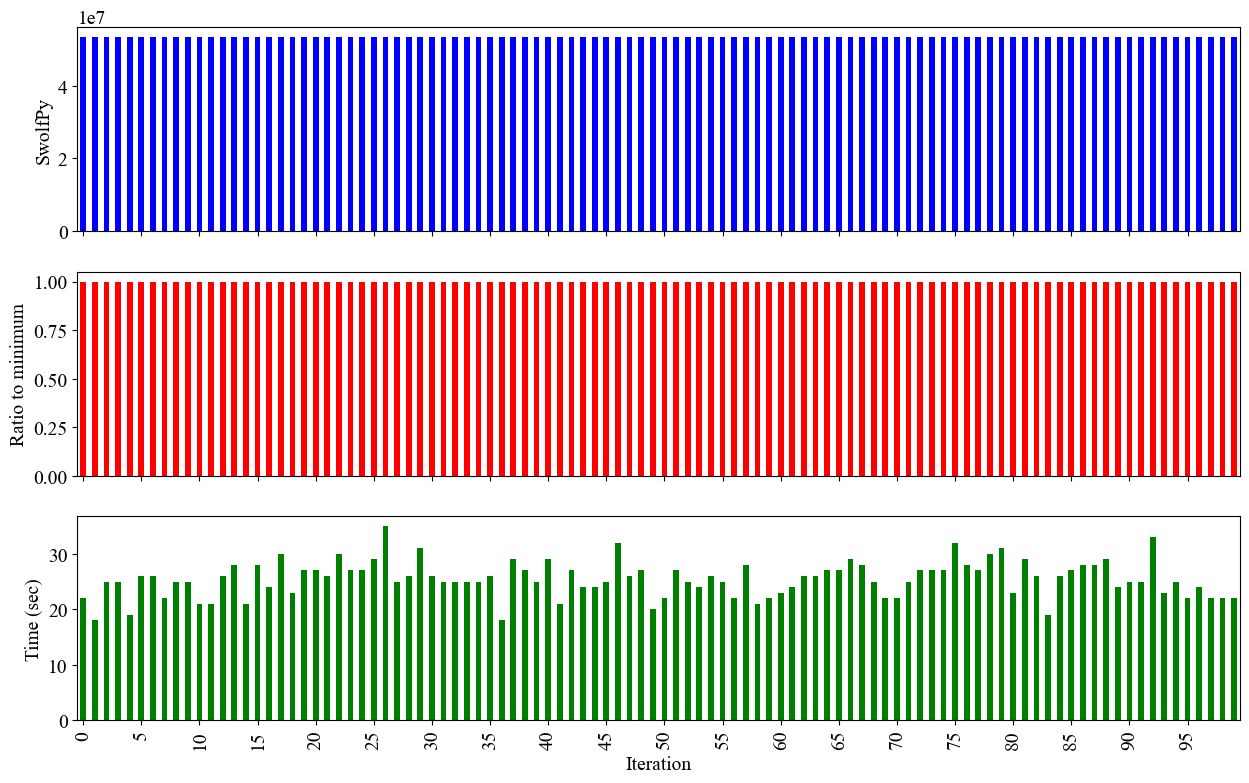

In [21]:
DF = Iterations_Performance(Opt, 'Iterations_Scenario_Social_AD_WTE.csv')

### Mass flows, impacts and costs

In [22]:
report_res(Opt, FU, 'OptimizeSocialbothmetricsADWTE.csv')

,Value,Unit
Diversion,0.0,%
GWP,-52.71,kg CO2/Mg
Operation Cost,52.47,$/Mg
Capital cost,0.0,$/Mg
Total cost,52.47,$/Mg
Social cost,207.23,$/Mg
Collection,257549,Mg/yr
LF,257549,Mg/yr
Composting,0,Mg/yr
AD,0,Mg/yr


In [23]:
Opt.switch_method(('SwolfPy_Social','SwolfPy'))
Opt.lcia()
Opt.plot_sankey(fileName='OptimizeSocialbothmetricsADWTE.html')


              # Sankey Mass flows
              label = ['LF', 'Composting', 'AD', 'WTE', 'SS_MRF', 'Reprocessing', 'Collection']
              source = [1, 1, 2, 2, 4, 4, 6, 6, 6, 6, 6, 6, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 6, 6, 6]
              target = [0, 3, 0, 3, 0, 3, 0, 3, 1, 2, 0, 3, 0, 0, 0, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 1, 1]
              label_link = ['Other_Residual', 'Other_Residual', 'Other_Residual', 'Other_Residual', 'Other_Residual', 'Other_Residual', 'RWC', 'RWC', 'SSO', 'SSO', 'MRDO', 'MRDO', 'Bottom_Ash', 'Fly_Ash', 'Unreacted_Ash', 'Al', 'Fe', 'LDPE_Film', 'OCC', 'Mixed_Paper', 'ONP', 'OFF', 'Fiber_Other', 'Brown_glass', 'Clear_glass', 'Green_glass', 'Mixed_Glass', 'PET', 'HDPE_P', 'HDPE_T', 'Fe', 'Al', 'SSR', 'SSYW', 'SSYWDO']
              value = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 257548.89, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 

In [24]:
Opt.optimized_x

[{'name': 'frac_of_Other_Residual_from_Composting_to_LF', 'amount': 0.5049},
 {'name': 'frac_of_Other_Residual_from_Composting_to_WTE', 'amount': 0.4951},
 {'name': 'frac_of_Other_Residual_from_AD_to_LF', 'amount': 0.4484},
 {'name': 'frac_of_Other_Residual_from_AD_to_WTE', 'amount': 0.5516},
 {'name': 'frac_of_Other_Residual_from_SS_MRF_to_LF', 'amount': 0.2576},
 {'name': 'frac_of_Other_Residual_from_SS_MRF_to_WTE', 'amount': 0.7424},
 {'name': 'frac_of_RWC_from_Collection_to_LF', 'amount': 1.0},
 {'name': 'frac_of_RWC_from_Collection_to_WTE', 'amount': 0.0},
 {'name': 'frac_of_SSO_from_Collection_to_Composting', 'amount': 0.468},
 {'name': 'frac_of_SSO_from_Collection_to_AD', 'amount': 0.532},
 {'name': 'frac_of_MRDO_from_Collection_to_LF', 'amount': 0.4702},
 {'name': 'frac_of_MRDO_from_Collection_to_WTE', 'amount': 0.5298},
 {'name': ('Collection', ('RWC', 'N/A', 'N/A')), 'amount': 1.0},
 {'name': ('Collection', ('RWC', 'N/A', 'SSR')), 'amount': 0.0},
 {'name': ('Collection', ('RW

In [25]:
summary = f"""\n
********  Scenario Minimize Social - Summary *********
Number of decision variables: {len(Opt.optimized_x)}
Number of constraints: {len(Opt._create_constraints())}
Total time: {str(datetime.timedelta(seconds=round(total_time)))}
Average time per iteration: {str(datetime.timedelta(seconds=round(DF['Time'].mean())))}
Successful iterations: {sum(DF['Ratio']>0)}
Number of best iterations: {sum(DF['Ratio']>0.99)}
Number of >95 iterations: {sum(DF['Ratio']>0.95)}\n\n"""
print(summary)
text_file = open("Summary.txt", "a")
text_file.write(summary)
text_file.close()



 collection constraints dict: 
 {'Collection': [12, 13, 14, 15, 16, 17]} 




********  Scenario Minimize Social - Summary *********
Number of decision variables: 18
Number of constraints: 7
Total time: 0:06:56
Average time per iteration: 0:00:25
Successful iterations: 100
Number of best iterations: 100
Number of >95 iterations: 100




### Optimization: Minimize cost

In [26]:
Opt=sp.Optimization(Demand,[('SwolfPy_Total_Cost', 'SwolfPy')],demo)
config=Opt.config(demo)
config.iloc[6:,1] = 'Fix'
Opt.set_config(config)
print(config)

                                   Collection Collection mode
(RWC, N/A, N/A)                           0.5        Optimize
(RWC, N/A, SSR)                           0.0        Optimize
(RWC, SSYW, N/A)                          0.0        Optimize
(RWC, SSYW, SSR)                          0.5        Optimize
(RWC, SSO, N/A)                           0.0        Optimize
(RWC, SSO, SSR)                           0.0        Optimize
(RWC, SSO_AnF, N/A)                       0.0             Fix
(RWC, SSO_AnF, SSR)                       0.0             Fix
(REC_WetRes, N/A, REC_WetRes)             0.0             Fix
(REC_WetRes, SSYW, REC_WetRes)            0.0             Fix
(REC_WetRes, SSO, REC_WetRes)             0.0             Fix
(REC_WetRes, SSO_AnF, REC_WetRes)         0.0             Fix
(ORG_DryRes, ORG_DryRes, N/A)             0.0             Fix
(ORG_DryRes, ORG_DryRes, SSR)             0.0             Fix


In [27]:
start = time()
#sp.Optimization.multi_start_optimization(Opt, constraints=constraints, collection=True,
                                        # n_iter=n_iter, timeout=1000, nproc=n_proc, initialize_guess=iter_mehtod)


sp.Optimization.multi_start_optimization(Opt, collection=True,  n_iter=n_iter, timeout=1000,
                                         nproc=n_proc, initialize_guess=iter_mehtod)
total_time = round(time()-start)
print("Time for Optimization: {} second".format(total_time))
all_results_2 = Opt.all_results



                      Iteration: 0
                      Status: True, Message: Optimization terminated successfully
                      Objective function: 6646380.336606099
                      Global min: 6646380.336606099 

                      


                      Iteration: 1
                      Status: True, Message: Optimization terminated successfully
                      Objective function: 6682824.405171169
                      Global min: 6646380.336606099 

                      


                      Iteration: 2
                      Status: True, Message: Optimization terminated successfully
                      Objective function: 6669656.909060521
                      Global min: 6646380.336606099 

                      


                      Iteration: 3
                      Status: True, Message: Optimization terminated successfully
                      Objective function: 6671873.517783994
                      Global min: 6646380.336606099 


C:\Users\jenny\anaconda3\envs\swolfpy\Lib\site-packages\swolfpy_processmodels\SF_Col.py:793: FutureWarning:

The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.

C:\Users\jenny\anaconda3\envs\swolfpy\Lib\site-packages\swolfpy_processmodels\SF_Col.py:794: FutureWarning:

The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.

C:\Users\jenny\anaconda3\envs\swolfpy\Lib\site-packages\swolfpy_processmodels\SF_Col.py:793: FutureWarning:

The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.

C:\Users\jenny\anaconda3\envs\swolfpy\Lib\site-packages\swolfpy_processmodels\SF_Col.py:794: FutureWarning:

The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to

### Performance of Iterations

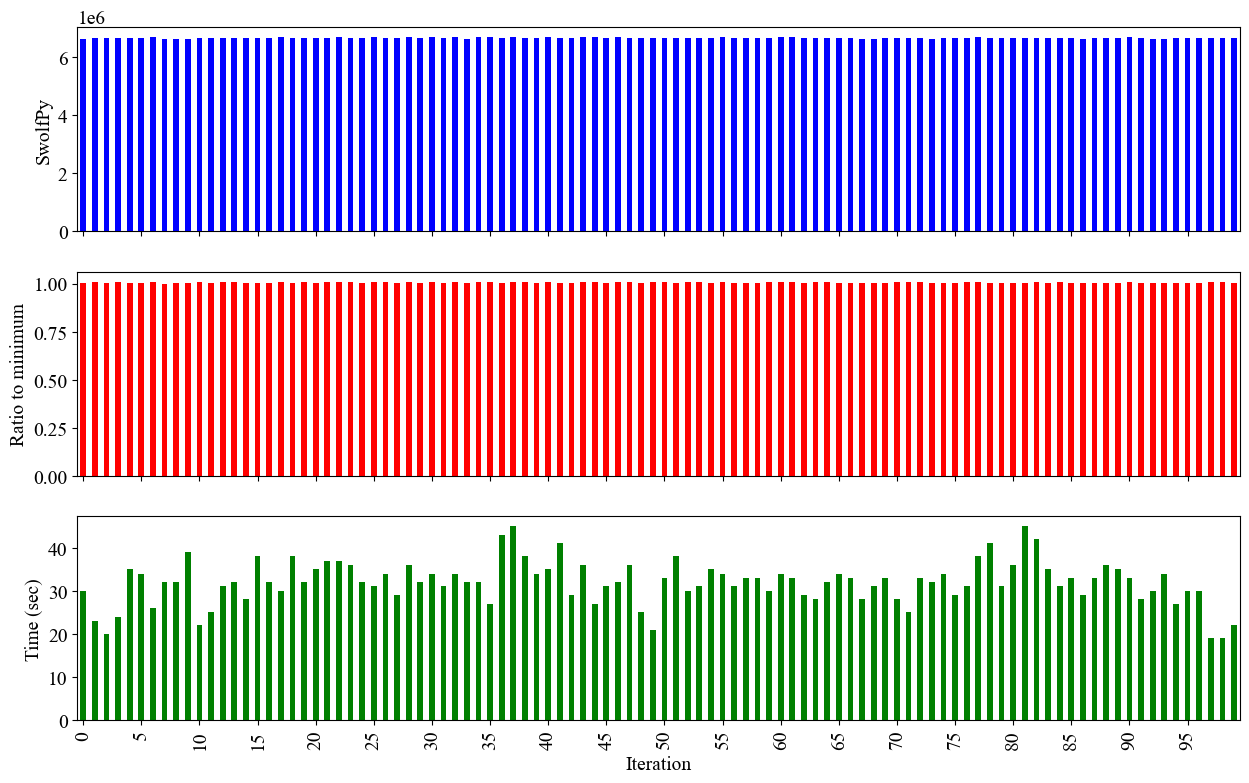

In [28]:
DF = Iterations_Performance(Opt, 'Iterations_Scenario_Cost_Social_AD_WTE.csv')

### Mass flows, impacts and costs

In [29]:
report_res(Opt, FU, 'OptimizeCost_SocialADWTE.csv')

,Value,Unit
Diversion,21.85,%
GWP,-316.5,kg CO2/Mg
Operation Cost,23.22,$/Mg
Capital cost,2.54,$/Mg
Total cost,25.76,$/Mg
Social cost,322.42,$/Mg
Collection,257549,Mg/yr
LF,201270,Mg/yr
Composting,0,Mg/yr
AD,0,Mg/yr


In [30]:
Opt.switch_method(('SwolfPy_Total_Cost', 'SwolfPy'))
Opt.lcia()
Opt.plot_sankey(fileName='OptimizeCost_SocialADWTE.html')


              # Sankey Mass flows
              label = ['LF', 'Composting', 'AD', 'WTE', 'SS_MRF', 'Reprocessing', 'Collection']
              source = [1, 1, 2, 2, 4, 4, 6, 6, 6, 6, 6, 6, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 6, 6, 6]
              target = [0, 3, 0, 3, 0, 3, 0, 3, 1, 2, 0, 3, 0, 0, 0, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 1, 1]
              label_link = ['Other_Residual', 'Other_Residual', 'Other_Residual', 'Other_Residual', 'Other_Residual', 'Other_Residual', 'RWC', 'RWC', 'SSO', 'SSO', 'MRDO', 'MRDO', 'Bottom_Ash', 'Fly_Ash', 'Unreacted_Ash', 'Al', 'Fe', 'LDPE_Film', 'OCC', 'Mixed_Paper', 'ONP', 'OFF', 'Fiber_Other', 'Brown_glass', 'Clear_glass', 'Green_glass', 'Mixed_Glass', 'PET', 'HDPE_P', 'HDPE_T', 'Fe', 'Al', 'SSR', 'SSYW', 'SSYWDO']
              value = [0.0, 0.0, 0.0, 0.0, 9026.429, 191.738, 192188.969, 0.0, 0.0, 0.0, 0.0, 0.0, 49.194, 5.689, 0.0, 1.718, 9.818, 2038.744, 10731.427, 34102.997, 0.0, 0.0, 0.0, 1067.249,

In [31]:
Opt.optimized_x

[{'name': 'frac_of_Other_Residual_from_Composting_to_LF', 'amount': 0.6547},
 {'name': 'frac_of_Other_Residual_from_Composting_to_WTE', 'amount': 0.3453},
 {'name': 'frac_of_Other_Residual_from_AD_to_LF', 'amount': 0.5423},
 {'name': 'frac_of_Other_Residual_from_AD_to_WTE', 'amount': 0.4577},
 {'name': 'frac_of_Other_Residual_from_SS_MRF_to_LF', 'amount': 0.9792},
 {'name': 'frac_of_Other_Residual_from_SS_MRF_to_WTE', 'amount': 0.0208},
 {'name': 'frac_of_RWC_from_Collection_to_LF', 'amount': 1.0},
 {'name': 'frac_of_RWC_from_Collection_to_WTE', 'amount': 0.0},
 {'name': 'frac_of_SSO_from_Collection_to_Composting', 'amount': 0.411},
 {'name': 'frac_of_SSO_from_Collection_to_AD', 'amount': 0.589},
 {'name': 'frac_of_MRDO_from_Collection_to_LF', 'amount': 0.693},
 {'name': 'frac_of_MRDO_from_Collection_to_WTE', 'amount': 0.307},
 {'name': ('Collection', ('RWC', 'N/A', 'N/A')), 'amount': 0.0},
 {'name': ('Collection', ('RWC', 'N/A', 'SSR')), 'amount': 1.0},
 {'name': ('Collection', ('RWC'

In [32]:
summary = f"""\n
********  Scenario Minimize Costs - Summary *********
Number of decision variables: {len(Opt.optimized_x)}
Number of constraints: {len(Opt._create_constraints())}
Total time: {str(datetime.timedelta(seconds=round(total_time)))}
Average time per iteration: {str(datetime.timedelta(seconds=round(DF['Time'].mean())))}
Successful iterations: {sum(DF['Ratio']>0)}
Number of best iterations: {sum(DF['Ratio']>0.99)}
Number of >95 iterations: {sum(DF['Ratio']>0.95)}\n\n"""
print(summary)
text_file = open("Summary.txt", "a")
text_file.write(summary)
text_file.close()



 collection constraints dict: 
 {'Collection': [12, 13, 14, 15, 16, 17]} 




********  Scenario Minimize Costs - Summary *********
Number of decision variables: 18
Number of constraints: 7
Total time: 0:08:16
Average time per iteration: 0:00:32
Successful iterations: 100
Number of best iterations: 100
Number of >95 iterations: 100




### Optimization: Minimize GHG

In [33]:
Opt=sp.Optimization(Demand,[('CML 2001 (obsolete)', 'climate change', 'GWP 100a')],demo)
config=Opt.config(demo)
config.iloc[6:,1] = 'Fix'
Opt.set_config(config)
print(config)

                                   Collection Collection mode
(RWC, N/A, N/A)                           0.5        Optimize
(RWC, N/A, SSR)                           0.0        Optimize
(RWC, SSYW, N/A)                          0.0        Optimize
(RWC, SSYW, SSR)                          0.5        Optimize
(RWC, SSO, N/A)                           0.0        Optimize
(RWC, SSO, SSR)                           0.0        Optimize
(RWC, SSO_AnF, N/A)                       0.0             Fix
(RWC, SSO_AnF, SSR)                       0.0             Fix
(REC_WetRes, N/A, REC_WetRes)             0.0             Fix
(REC_WetRes, SSYW, REC_WetRes)            0.0             Fix
(REC_WetRes, SSO, REC_WetRes)             0.0             Fix
(REC_WetRes, SSO_AnF, REC_WetRes)         0.0             Fix
(ORG_DryRes, ORG_DryRes, N/A)             0.0             Fix
(ORG_DryRes, ORG_DryRes, SSR)             0.0             Fix


In [34]:
start = time()
#sp.Optimization.multi_start_optimization(Opt, constraints=constraints, collection=True,
                                         #n_iter=n_iter, timeout=1000, nproc=n_proc, initialize_guess=iter_mehtod)

sp.Optimization.multi_start_optimization(Opt, collection=True,  n_iter=n_iter, timeout=1000,
                                         nproc=n_proc, initialize_guess=iter_mehtod)
total_time = round(time()-start)
print("Time for Optimization: {} second".format(total_time))
all_results_3 = Opt.all_results



                      Iteration: 0
                      Status: True, Message: Optimization terminated successfully
                      Objective function: -114743112.31422329
                      Global min: -114743112.31422329 

                      


                      Iteration: 1
                      Status: True, Message: Optimization terminated successfully
                      Objective function: -114743112.31477557
                      Global min: -114743112.31477557 

                      


                      Iteration: 2
                      Status: True, Message: Optimization terminated successfully
                      Objective function: -114743112.31397496
                      Global min: -114743112.31477557 

                      


                      Iteration: 3
                      Status: True, Message: Optimization terminated successfully
                      Objective function: -114743112.31434296
                      Global min: -1147

C:\Users\jenny\anaconda3\envs\swolfpy\Lib\site-packages\swolfpy_processmodels\SF_Col.py:793: FutureWarning:

The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.

C:\Users\jenny\anaconda3\envs\swolfpy\Lib\site-packages\swolfpy_processmodels\SF_Col.py:794: FutureWarning:

The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.

C:\Users\jenny\anaconda3\envs\swolfpy\Lib\site-packages\swolfpy_processmodels\SF_Col.py:793: FutureWarning:

The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.

C:\Users\jenny\anaconda3\envs\swolfpy\Lib\site-packages\swolfpy_processmodels\SF_Col.py:794: FutureWarning:

The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to

### Performance of Iterations

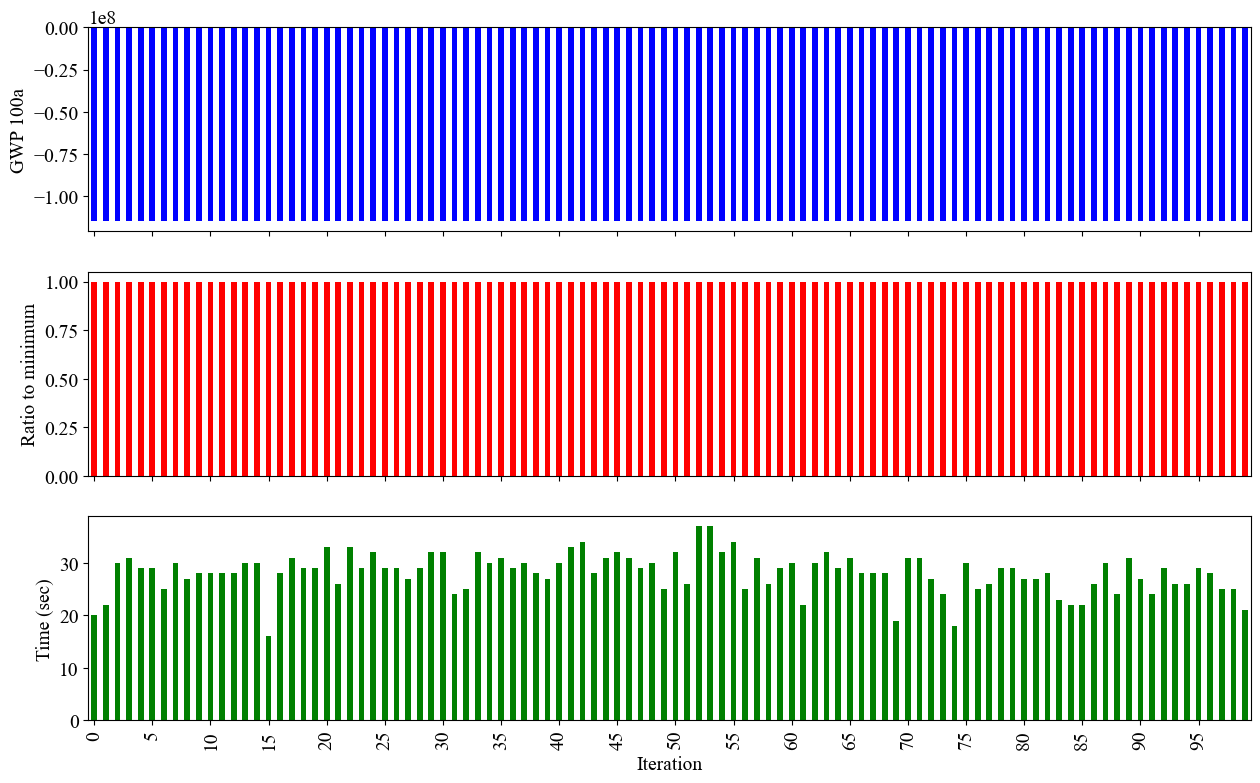

In [35]:
DF = Iterations_Performance(Opt, 'Iterations_Scenario_GHG_Social_AD_WTE.csv')

### Mass flows, impacts and costs

In [36]:
report_res(Opt, FU, 'OptimizeGHG_SocialADWTE.csv')

,Value,Unit
Diversion,79.68,%
GWP,-445.52,kg CO2/Mg
Operation Cost,12.48,$/Mg
Capital cost,31.12,$/Mg
Total cost,43.6,$/Mg
Social cost,343.96,$/Mg
Collection,257549,Mg/yr
LF,52326,Mg/yr
Composting,0,Mg/yr
AD,0,Mg/yr


In [37]:
Opt.switch_method(('CML 2001 (obsolete)', 'climate change', 'GWP 100a'))
Opt.lcia()
Opt.plot_sankey(fileName='OptimizeGHG_SocialADWTE.html')


              # Sankey Mass flows
              label = ['LF', 'Composting', 'AD', 'WTE', 'SS_MRF', 'Reprocessing', 'Collection']
              source = [1, 1, 2, 2, 4, 4, 6, 6, 6, 6, 6, 6, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 6, 6, 6]
              target = [0, 3, 0, 3, 0, 3, 0, 3, 1, 2, 0, 3, 0, 0, 0, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 1, 1]
              label_link = ['Other_Residual', 'Other_Residual', 'Other_Residual', 'Other_Residual', 'Other_Residual', 'Other_Residual', 'RWC', 'RWC', 'SSO', 'SSO', 'MRDO', 'MRDO', 'Bottom_Ash', 'Fly_Ash', 'Unreacted_Ash', 'Al', 'Fe', 'LDPE_Film', 'OCC', 'Mixed_Paper', 'ONP', 'OFF', 'Fiber_Other', 'Brown_glass', 'Clear_glass', 'Green_glass', 'Mixed_Glass', 'PET', 'HDPE_P', 'HDPE_T', 'Fe', 'Al', 'SSR', 'SSYW', 'SSYWDO']
              value = [0.0, 0.0, 0.0, 0.0, 0.0, 9218.167, 0.0, 192188.969, 0.0, 0.0, 0.0, 0.0, 46989.866, 5336.242, 0.0, 763.226, 3887.944, 2038.744, 10731.427, 34102.997, 0.0, 0.0, 0.0, 10

In [38]:
Opt.optimized_x

[{'name': 'frac_of_Other_Residual_from_Composting_to_LF', 'amount': 0.2349},
 {'name': 'frac_of_Other_Residual_from_Composting_to_WTE', 'amount': 0.7651},
 {'name': 'frac_of_Other_Residual_from_AD_to_LF', 'amount': 0.4636},
 {'name': 'frac_of_Other_Residual_from_AD_to_WTE', 'amount': 0.5364},
 {'name': 'frac_of_Other_Residual_from_SS_MRF_to_LF', 'amount': 0.0},
 {'name': 'frac_of_Other_Residual_from_SS_MRF_to_WTE', 'amount': 1.0},
 {'name': 'frac_of_RWC_from_Collection_to_LF', 'amount': 0.0},
 {'name': 'frac_of_RWC_from_Collection_to_WTE', 'amount': 1.0},
 {'name': 'frac_of_SSO_from_Collection_to_Composting', 'amount': 0.5437},
 {'name': 'frac_of_SSO_from_Collection_to_AD', 'amount': 0.4563},
 {'name': 'frac_of_MRDO_from_Collection_to_LF', 'amount': 0.1542},
 {'name': 'frac_of_MRDO_from_Collection_to_WTE', 'amount': 0.8458},
 {'name': ('Collection', ('RWC', 'N/A', 'N/A')), 'amount': 0.0},
 {'name': ('Collection', ('RWC', 'N/A', 'SSR')), 'amount': 1.0},
 {'name': ('Collection', ('RWC', 

In [39]:
summary = f"""\n
********  Scenario Minimize GHG - Summary *********
Number of decision variables: {len(Opt.optimized_x)}
Number of constraints: {len(Opt._create_constraints())}
Total time: {str(datetime.timedelta(seconds=round(total_time)))}
Average time per iteration: {str(datetime.timedelta(seconds=round(DF['Time'].mean())))}
Successful iterations: {sum(DF['Ratio']>0)}
Number of best iterations: {sum(DF['Ratio']>0.99)}
Number of >95 iterations: {sum(DF['Ratio']>0.95)}\n\n"""
print(summary)
text_file = open("Summary.txt", "a")
text_file.write(summary)
text_file.close()



 collection constraints dict: 
 {'Collection': [12, 13, 14, 15, 16, 17]} 




********  Scenario Minimize GHG - Summary *********
Number of decision variables: 18
Number of constraints: 7
Total time: 0:07:29
Average time per iteration: 0:00:28
Successful iterations: 100
Number of best iterations: 100
Number of >95 iterations: 100


